In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
income_df = pd.read_csv('/home/student/IngajiDemo/dataset.csv')

In [2]:
# print(income_df.isna().sum())

In [6]:
income_df['Household_Head_Occupation'] = income_df.groupby('Household_Head_Highest_Grade_Completed')['Household_Head_Occupation'].transform(lambda x: x.ffill().bfill())

In [5]:
# print(income_df.isna().sum())

In [7]:
income_df['Household_Head_Class_of_Worker'] = income_df.groupby('Household_Head_Occupation')['Household_Head_Class_of_Worker'].transform(lambda x: x.ffill().bfill())

In [8]:
income_df['Total_Number_of_Family_members'] = income_df.groupby('Type_of_Household')['Total_Number_of_Family_members'].transform(lambda x: x.ffill().bfill())

In [27]:
# print(income_df.isna().sum())

In [9]:
income_df['Toilet_Facilities'] = income_df.groupby('Total_Number_of_Family_members')['Toilet_Facilities'].transform(lambda x: x.ffill().bfill())

## Column Description
1. Total_Household_Income: Total income of the household, which is crucial for assessing repayment capacity.
2. Region: Geographical location, which may influence income levels and access to resources.
3. Total_Food_Expenditure: Indicates spending habits and financial management skills, important for understanding financial stability.
4. Main_Source_of_Income: Identifies primary income source, affecting economic stability and predictability of income.
5. Agricultural_Household_Indicator: Whether the household is primarily engaged in agriculture, relevant for understanding risks associated with agricultural loans.
6. Bread_and_Cereals_Expenditure: Spending on staples; high expenditure may indicate financial strain or food security issues.
7. Total_Rice_Expenditure: Specific food expenditure, important in rice-dependent regions for assessing basic needs coverage.
8. Meat_Expenditure: Indicates dietary habits and potential disposable income.
9. Total_Fish_and_Marine_Products_Expenditure: Reflects dietary diversity and potential economic stability.
10. Fruit_Expenditure: Another measure of dietary habits, can indicate health and economic conditions.
11. Vegetables_Expenditure: Similar to fruit expenditure, reflecting spending habits and nutritional status.
12. Restaurant_and_Hotels_Expenditure: Indicates discretionary spending; lower spending could signify economic hardship.
13. Alcoholic_Beverages_Expenditure: Spending on alcohol may reflect lifestyle choices affecting financial management.
14. Tobacco_Expenditure: Spending on tobacco can indicate financial priorities and health-related costs.
15. Clothing, Footwear, and Other Wear Expenditure: A measure of consumer spending reflecting lifestyle and disposable income.
16. Housing_and_Water_Expenditure: Vital for understanding housing stability, which impacts overall creditworthiness.
17. Imputed_House_Rental_Value: Represents potential income from owning property, relevant for asset valuation.
18. Medical_Care_Expenditure: Indicates financial burden from healthcare, affecting available resources for loan repayment.
19. Transportation_Expenditure: Reflects mobility and potential for economic activity, impacting income generation.
20. Communication_Expenditure: Vital for assessing connectivity and access to information, which can affect business opportunities.
21. Education_Expenditure: Higher spending may correlate with better future income potential, influencing loan repayment prospects.
22. Miscellaneous_Goods_and_Services_Expenditure: Other expenditures can indicate overall financial health.
23. Special_Occasions_Expenditure: Reflects cultural practices and potential financial stress during celebrations.
24. Crop_Farming_and_Gardening_expenses: Directly relevant for assessing investment in agriculture, crucial for loan evaluation.
25. Total_Income_from_Entrepreneurial_Activities: Additional income source, important for total income assessment and repayment capacity.
26. Household_Head_Sex: Gender may influence household income dynamics and access to credit.
27. Household_Head_Age: Age may correlate with experience and financial stability.
28. Household_Head_Marital_Status: Marital status can affect household stability and income generation.
29. Household_Head_Highest_Grade_Completed: Education level can influence income potential and loan eligibility.
30. Household_Head_Job_or_Business_Indicator: Employment status directly impacts financial stability.
31. Household_Head_Occupation: Specific job type can indicate income levels and financial security.
32. Household_Head_Class_of_Worker: Employment classification affects income stability.
33. Type_of_Household: Structure of the household can impact financial dynamics and resource allocation.
34. Total_Number_of_Family_members: Family size can affect income distribution and financial burden.
35. Members_with_age_less_than_5_year_old: Younger dependents can indicate higher household expenses.
36. Members_with_age_5_-_17_years_old: Children in this age range may reflect education-related expenditures.
37. Total_number_of_family_members_employed: Employment levels can provide insights into household income stability.
38. Type_of_Building/House: Type of dwelling can reflect economic status and potential asset value.
39. Type_of_Roof: Indicates quality of housing, which can correlate with wealth.
40. Type_of_Walls: Similar to roof type, reflects household stability and asset quality.
41. House_Floor_Area: Larger areas may indicate better economic conditions and asset stability.
42. House_Age: Older houses may require more maintenance, impacting financial health.
43. Number_of_bedrooms: Indicates household size and living conditions.
44. Tenure_Status: Owning vs. renting impacts financial stability and asset value.
45. Toilet_Facilities: Access to sanitation can reflect overall living standards.
46. Electricity: Access to electricity indicates economic development and potential for productivity.
47. Main_Source_of_Water_Supply: Water access impacts living conditions and agricultural viability.
48. Number_of_Television: Ownership may reflect disposable income.
49. Number_of_CD/VCD/DVD: Similar to television ownership, reflects spending on entertainment.
50. Number_of_Component/Stereo_set: Indicates lifestyle and economic status.
52. Number_of_Washing_Machine: Ownership reflects financial capability and lifestyle
53. Number_of_Airconditioner: Indicates economic status and comfort level.
54. Number_of_Car,_Jeep,_Van: Vehicle ownership signifies economic capability and mobility.
55. Number_of_Landline/wireless_telephones: Communication access affects connectivity and business potential.
56. Number_of_Cellular_phone: Smartphone ownership reflects economic status and communication access.
57. Number_of_Personal_Computer: Indicates technological access, affecting education and economic opportunities.
58. Number_of_Stove_with_Oven/Gas_Range: Kitchen appliances can indicate household economic status.
59. Number_of_Motorized_Banca: Relevant for rural economies; reflects livelihood and mobility.
60. Number_of_Motorcycle/Tricycle: Transportation availability can impact access to markets and services.

In [11]:
# This are filtered columns for farmers occupations only 
farmer_occupations = [
    'Farmers', 'Agricultural laborers', 'Rice farmers', 'Crop Farming and Gardening',
    'Livestock farmers', 'Agricultural technicians', 'Farmhands and laborers', 'Hog raising farmers']

In [12]:
farmers_df = income_df[income_df['Household_Head_Occupation'].isin(farmer_occupations)]

# This list contains the names of various expenditure columns related to household spending. This list will be used to calculate total expenditures later.

In [13]:
expenditure_columns = [
    'Total_Food_Expenditure', 'Bread_and_Cereals_Expenditure', 'Total_Rice_Expenditure',
    'Meat_Expenditure', 'Total_Fish_and__marine_products_Expenditure', 'Fruit_Expenditure',
    'Vegetables_Expenditure', 'Restaurant_and_hotels_Expenditure', 'Alcoholic_Beverages_Expenditure',
    'Tobacco_Expenditure', 'Clothing,_Footwear_and_Other_Wear_Expenditure',
    'Housing_and_water_Expenditure', 'Medical_Care_Expenditure', 'Transportation_Expenditure',
    'Communication_Expenditure', 'Education_Expenditure', 'Miscellaneous_Goods_and_Services_Expenditure',
    'Special_Occasions_Expenditure', 'Crop_Farming_and_Gardening_expenses'
]

In [14]:
# Create a copy of the filtered DataFrame
farmers_df = income_df[income_df['Household_Head_Occupation'].isin(farmer_occupations)].copy()

# Calculate Total Expenditures
farmers_df['Total_Expenditures'] = farmers_df[expenditure_columns].sum(axis=1)

# Calculate Remaining Income
farmers_df['Remaining_Income'] = farmers_df['Total_Household_Income'] - farmers_df['Total_Expenditures']

In [71]:
# This function assigns a credit score and a loan range based on the Remaining_Income. The logic is:
# If the remaining income is greater than 50,000, the score is 750 with a loan range of "50,000 - 100,000".
# Different thresholds assign lower scores and ranges for lower income levels.

In [15]:
# Define function to assign credit score and loan range based on remaining income
def assign_credit_score_and_loan_range(row):
    if row['Remaining_Income'] > 50000:
        return 750, '50,000 - 100,000'
    elif row['Remaining_Income'] > 20000:
        return 600, '20,000 - 50,000'
    elif row['Remaining_Income'] > 5000:
        return 500, '5,000 - 20,000'
    else:
        return 400, '1,000 - 5,000'

In [16]:
# Assign credit scores and loan ranges using .loc to avoid SettingWithCopyWarning
credit_scores, loan_ranges = zip(*farmers_df.apply(assign_credit_score_and_loan_range, axis=1))
farmers_df.loc[:, 'Credit_Score'] = credit_scores
farmers_df.loc[:, 'Loan_Range'] = loan_ranges

In [17]:
# Identify categorical and numerical columns for further analysis
categorical_columns = [
    'Region', 'Main_Source_of_Income', 'Household_Head_Sex', 'Household_Head_Marital_Status',
    'Household_Head_Highest_Grade_Completed', 'Household_Head_Job_or_Business_Indicator',
    'Household_Head_Occupation', 'Household_Head_Class_of_Worker', 'Type_of_Household',
    'Type_of_Building/House', 'Type_of_Roof', 'Type_of_Walls', 'Tenure_Status',
    'Toilet_Facilities', 'Electricity', 'Main_Source_of_Water_Supply'
]

numerical_columns = [
    'Total_Household_Income', 'Total_Expenditures', 'Remaining_Income'
]

In [72]:
# Here, I have initialized the OneHotEncoder and apply it to the categorical columns to 
# convert them into a numerical format suitable for analysis through feature engineering. 
# The sparse_output=False option ensures the output is a dense array.

In [18]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
encoded_cats = encoder.fit_transform(farmers_df[categorical_columns])

In [19]:
# Create DataFrame from encoded categorical features
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded categorical features with the numerical features
data_encoded = pd.concat([farmers_df[numerical_columns].reset_index(drop=True), encoded_cats_df], axis=1)

In [24]:
# Standardize numerical columns
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

In [25]:
# Check the mean and std after scaling
scaled_means = data_encoded[numerical_columns].mean()
scaled_stds = data_encoded[numerical_columns].std()

print("Means after scaling:\n", scaled_means)
print("\nStandard deviations after scaling:\n", scaled_stds)

Means after scaling:
 Total_Household_Income    7.211801e-18
Total_Expenditures       -7.211801e-18
Remaining_Income          9.014752e-18
dtype: float64

Standard deviations after scaling:
 Total_Household_Income    1.000063
Total_Expenditures        1.000063
Remaining_Income          1.000063
dtype: float64


In [ ]:
# KMeans clustering is applied to the standardized data with a specified number of clusters (3). 
# The resulting cluster assignments are added to the DataFrame as a new column named Cluster.

In [21]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data_encoded['Cluster'] = kmeans.fit_predict(data_encoded)

In [2]:
# data_encoded.head(20)

In [1]:
# test=np.array([65000.0])
# test_reshaped=test.reshape(-1, 1)
# kmeans.predict(test_reshaped)

In [22]:
# Compute mean values for each cluster
# Counting all the values in each cluster on every column and figuring out the average size
cluster_summary = data_encoded.groupby('Cluster').mean()
print("Cluster Summary:")
# print(cluster_summary)

Cluster Summary:


In [ ]:
# We visualize the clusters using a pair plot, which shows relationships between the numerical features colored by cluster. 
# This visualization helps to observe patterns and differences among the clusters.

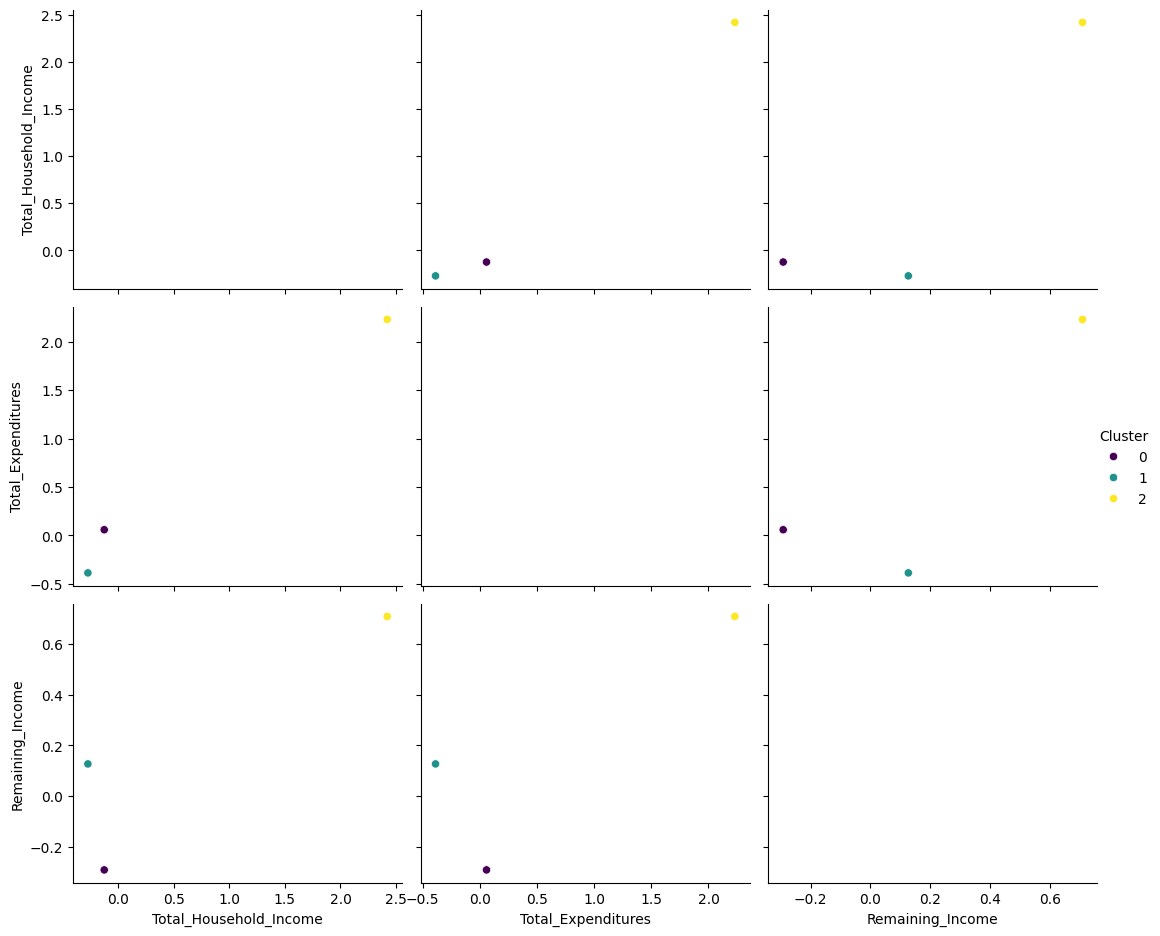

In [22]:
# Visualizing the clusters
features = ['Total_Household_Income', 'Total_Expenditures', 'Remaining_Income']
cluster_summary['Cluster'] = cluster_summary.index
cluster_summary_reset = cluster_summary.reset_index(drop=True)

pairplot = sns.pairplot(cluster_summary_reset, vars=features, hue='Cluster', palette='viridis')
pairplot.fig.set_size_inches(12, 10)
plt.subplots_adjust(top=0.95, right=0.95)  
plt.show()

In [ ]:
# I have visualized the clusters using a pair plot, which shows relationships between the numerical features colored by cluster. 
# This visualization helps to observe patterns and differences among the clusters.

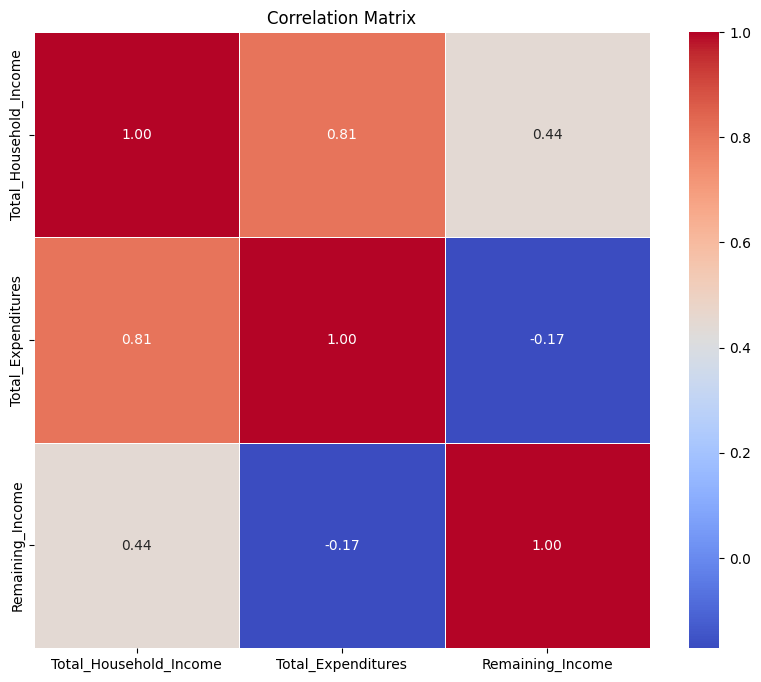

In [68]:
# Compute and visualize correlation metrics
correlation_matrix = farmers_df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()